First 5 rows of the dataframe:
         Date      Open      High       Low     Close   Shares Traded   \
0  19-FEB-2024  22103.45  22186.65  22021.05  22122.25     218252325.0   
1  20-FEB-2024  22099.20  22215.60  22045.85  22196.95     295705319.0   
2  21-FEB-2024  22248.85  22249.40  21997.95  22055.05     364545679.0   
3  22-FEB-2024  22081.55  22252.50  21875.25  22217.45     343495136.0   
4  23-FEB-2024  22290.00  22297.50  22186.10  22212.70     225983194.0   

   Turnover (₹ Cr)  
0         21375.71  
1         26872.32  
2         29741.39  
3         33985.94  
4         24617.01  

Data types of each column:
Date                object
Open               float64
High               float64
Low                float64
Close              float64
Shares Traded      float64
Turnover (₹ Cr)    float64
dtype: object

Missing values in the dataframe:
Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnove

<ipython-input-2-bb9bbc821a06>:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close '] = df['Close '].fillna(method='ffill') #added space
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 1.0566 - val_loss: 0.2006
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6337 - val_loss: 0.1736
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3077 - val_loss: 0.1539
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1904 - val_loss: 0.1266
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1072 - val_loss: 0.1041
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0890 - val_loss: 0.0989
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0923 - val_loss: 0.1006
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0695 - val_loss: 0.0985
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0703 - val_loss: 0.0940
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0641 - val_loss: 0.0957
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0646 - val_loss: 0.0961
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0478 - val_loss: 0.0979
Epoch 13/20


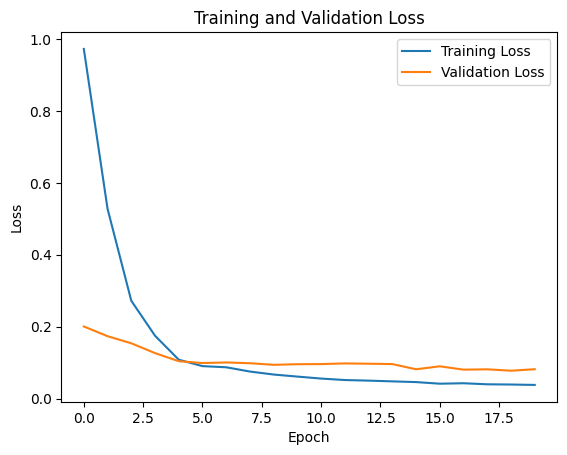

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


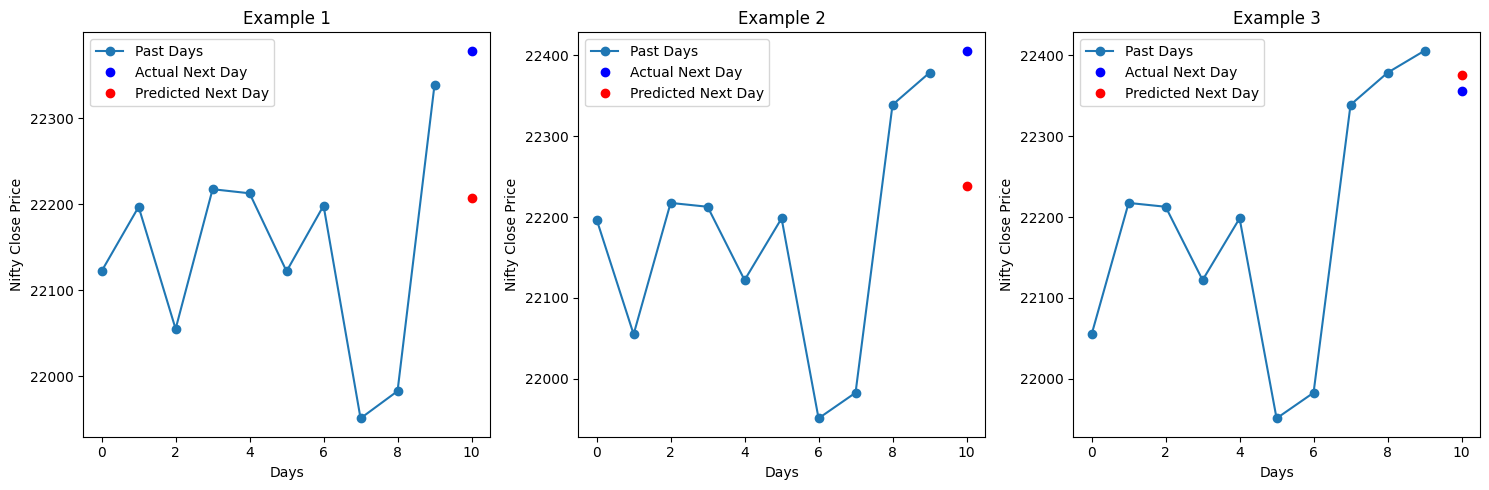

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load dataset, use the correct file path
# If the file is uploaded to Colab, it will be in the /content/ directory
file_path = "/content/Nifty.csv"

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.  Make sure you have uploaded it to /content/ in Google Colab.")
    exit()

# Data Inspection
print("First 5 rows of the dataframe:")
print(df.head())
print("\nData types of each column:")
print(df.dtypes)
print("\nMissing values in the dataframe:")
print(df.isnull().sum())

# Convert 'Date' column to datetime objects. Handle potential errors during parsing.
try:
    df['Date '] = pd.to_datetime(df['Date '], format='%d-%b-%Y', errors='raise') #added space
except ValueError as e:
    print(f"Error parsing 'Date' column: {e}")
    print("Please ensure the date format in the CSV is consistent and matches '%d-%b-%Y'.")
    exit()
except KeyError:
    print("Error: The 'Date' column was not found. Check the CSV file's header.")
    exit()

# Sort DataFrame by date
df = df.sort_values(by='Date ') #added space

# Use the 'Close' column as the time series
try:
    series = df['Close '].values #added space
except KeyError:
    print("Error: The 'Close' column was not found in the CSV file.  Check the column name.")
    exit()

# Data Preprocessing
series = series.reshape(-1, 1)

# Handle missing values (if any) by forward filling
df['Close '] = df['Close '].fillna(method='ffill') #added space
series = df['Close '].values.reshape(-1, 1) #added space


# Normalize the data
mean = series.mean()
std = series.std()
series = (series - mean) / std

# Create Sequences
timesteps = 10

def create_sequences(series, timesteps):
    X, y = [], []
    for i in range(len(series) - timesteps):
        X.append(series[i:i+timesteps])
        y.append(series[i+timesteps])
    return np.array(X), np.array(y)

X, y = create_sequences(series, timesteps)

# Reshape X for MLP input
X = X.reshape(X.shape[0], -1)  # Flatten the input

# Build the MLP Model
model_mlp = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the Model
model_mlp.compile(optimizer='adam', loss='mse')

# Train the Model
history_mlp = model_mlp.fit(X, y, epochs=20, verbose=1, validation_split=0.2)

# Evaluate the Model
loss = model_mlp.evaluate(X, y, verbose=0)
print(f'Mean Squared Error: {loss:.4f}')

# Plotting Loss
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make Predictions
num_plots = 3 #number of predictions to plot
predictions_mlp = model_mlp.predict(X[:num_plots])

# Inverse transform predictions and actual values
predictions_mlp = predictions_mlp * std + mean
y_orig = y[:num_plots] * std + mean
X_orig = X[:num_plots] * std + mean

# Visualize Predictions
plt.figure(figsize=(15, 5))
for i in range(num_plots):
    plt.subplot(1, num_plots, i + 1)
    # Inverse transform the past values as well
    past_values = X_orig[i].reshape(timesteps)
    plt.plot(range(timesteps), past_values, label="Past Days", marker='o')
    plt.plot(timesteps, y_orig[i], "bo", label="Actual Next Day")
    plt.plot(timesteps, predictions_mlp[i], "ro", label="Predicted Next Day")
    plt.title(f"Example {i+1}")
    plt.xlabel("Days")
    plt.ylabel("Nifty Close Price")
    plt.legend()
plt.tight_layout()
plt.show()
